In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.constants import c

def ants_locations():
    return np.array([[-0.0275, -0.0267, 0], # tx
                     [-0.0253, -0.0267, 0],
                     [-0.0231, -0.0267, 0],
                     [-0.0209, -0.0267, 0],
                     [-0.0187, -0.0267, 0],
                     [-0.0165, -0.0267, 0],
                     [-0.0143, -0.0267, 0],
                     [-0.0122, -0.0267, 0],
                     [-0.0100, -0.0267, 0],
                     [-0.0078, -0.0267, 0],
                     [-0.0056, -0.0267, 0],
                     [-0.0034, -0.0267, 0],
                     [-0.0012, -0.0267, 0],
                     [ 0.0009, -0.0267, 0],
                     [ 0.0031, -0.0267, 0],
                     [ 0.0053, -0.0267, 0],
                     [ 0.0075, -0.0267, 0],
                     [ 0.0097, -0.0267, 0],
                     [ 0.0119, -0.0267, 0],
                     [ 0.0141, -0.0267, 0],
                     [ 0.0274, -0.0133, 0], # rx
                     [ 0.0274, -0.0112, 0],
                     [ 0.0274, -0.0091, 0],
                     [ 0.0274, -0.0070, 0],
                     [ 0.0274, -0.0049, 0],
                     [ 0.0274, -0.0028, 0],
                     [ 0.0274, -0.0007, 0],
                     [ 0.0275,  0.0014, 0],
                     [ 0.0275,  0.0035, 0],
                     [ 0.0275,  0.0056, 0],
                     [ 0.0275,  0.0078, 0],
                     [ 0.0275,  0.0099, 0],
                     [ 0.0275,  0.0120, 0],
                     [ 0.0274,  0.0141, 0],
                     [ 0.0274,  0.0162, 0],
                     [ 0.0275,  0.0183, 0],
                     [ 0.0275,  0.0204, 0],
                     [ 0.0275,  0.0225, 0],
                     [ 0.0275,  0.0246, 0],
                     [ 0.0275,  0.0267, 0]])

In [88]:
current_case = 'test04242023'
current_scenario = '2cf_xx_angle_+-20_3'
data_path = os.path.join('./data', current_case, current_scenario)

cal_arr = np.load(os.path.join(data_path, 'calibration.npy'))
rec_arr = np.load(os.path.join(data_path, 'recording.npy'))
pro_arr = rec_arr - np.mean(cal_arr, axis=0)

tx_arr = ants_locations()[:20,:]
rx_arr = ants_locations()[20:,:]

131


Text(0, 0.5, 'AoA [deg]')

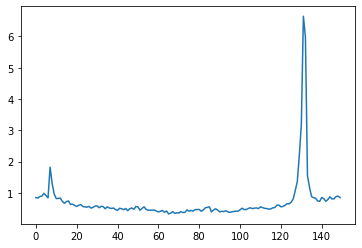

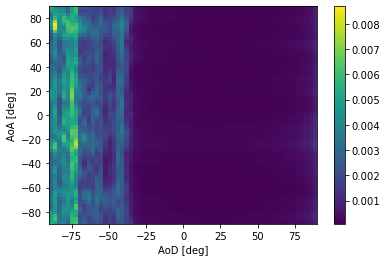

In [92]:
angle_Nfft = 64
range_Nfft = 512
chosen_frame = 50
angle_vec = np.linspace(-90,90,angle_Nfft)
pro_arr_3D = pro_arr.reshape(-1,20,20,150)[chosen_frame,:,:,:]
pro_arr_3D = np.fft.fft(pro_arr_3D, n=range_Nfft, axis=2).T
pro_arr_3D = np.fft.ifft(pro_arr_3D, n=angle_Nfft, axis = 1)
pro_arr_3D = np.fft.ifft(pro_arr_3D, n=angle_Nfft, axis = 0)
# pro_arr_ifft = np.fft.ifft(pro_arr,n=512,axis=2)
range_profile = np.linalg.norm(np.fft.fft(pro_arr[chosen_frame,:,:], axis=1),axis=0)
plt.figure()
plt.plot(range_profile)
print(np.argmax(range_profile))
people = np.argmax(range_profile)
pro_arr_3D = np.linalg.norm(pro_arr_3D,axis=2)
# pro_arr_3D = pro_arr_3D[:,:,people]
extent = [np.min(angle_vec), np.max(angle_vec), np.min(angle_vec), np.max(angle_vec)]
plt.figure()
plt.imshow(np.abs(pro_arr_3D[:,:]).T,origin='lower',aspect='auto', extent=extent)
plt.colorbar()
plt.xlabel('AoD [deg]')
plt.ylabel('AoA [deg]')


In [17]:
grid_size = 64
time_delay = np.zeros((grid_size,grid_size,grid_size))
grid_array = np.linspace(0,3,grid_size) # meter
X, Y, Z = np.meshgrid(grid_array, grid_array, grid_array, indexing='ij')
print(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            x_coord = X[i, j, k]
            y_coord = Y[i, j, k]
            z_coord = Z[i, j, k]
            for tx in tx_arr:
                for rx in rx_arr:
                    time_delay[i,j,k] = np.sqrt((x_coord-tx[0])**2 + (y_coord-tx[1])**2 + (z_coord-tx[2])**2) + np.sqrt((x_coord-rx[0])**2 + (y_coord-rx[1])**2 + (z_coord-rx[2])**2)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.04761905 0.04761905 0.04761905 ... 0.04761905 0.04761905 0.04761905]
  [0.04761905 0.04761905 0.04761905 ... 0.04761905 0.04761905 0.04761905]
  [0.04761905 0.04761905 0.04761905 ... 0.04761905 0.04761905 0.04761905]
  ...
  [0.04761905 0.04761905 0.04761905 ... 0.04761905 0.04761905 0.04761905]
  [0.04761905 0.04761905 0.04761905 ... 0.04761905 0.04761905 0.04761905]
  [0.04761905 0.04761905 0.04761905 ... 0.04761905 0.04761905 0.04761905]]

 [[0.0952381  0.0952381  0.0952381  ... 0.0952381  0.0952381  0.0952381 ]
  [0.0952381  0.095238